In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from scipy import signal
from scipy.signal import butter, filtfilt

In [2]:
serialArduino = serial.Serial("COM4", 115200)
    
l = []

for i in range(8000): # 4200 en el rango para 4 min
    l2 = serialArduino.readline().decode('utf-8')
    l2 = float(l2)
    l.append(l2)

In [3]:
len(l)

8000

In [4]:
tiempo = np.arange(0, 4, 0.0005) # 210 en medio, para los 4 min

In [5]:
len(tiempo)

8000

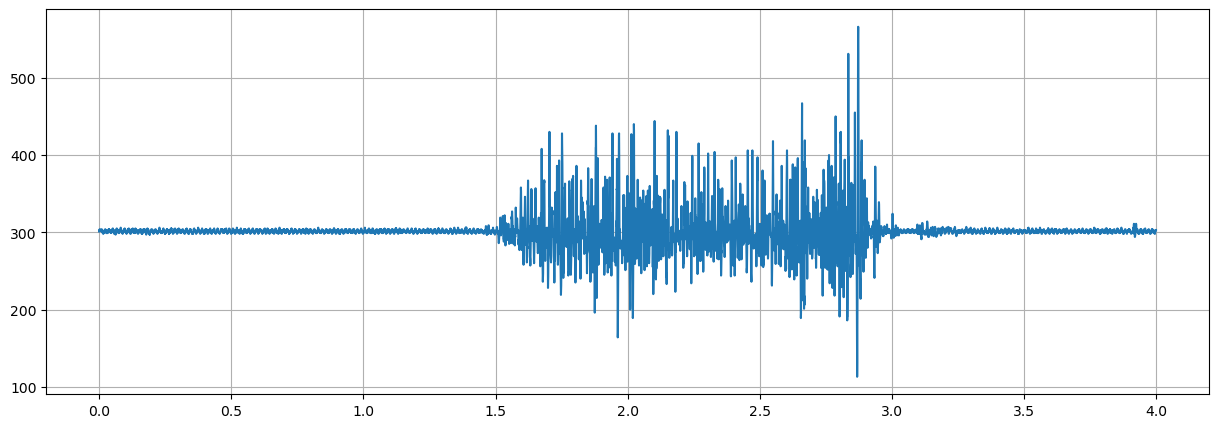

In [6]:
plt.figure(figsize = (15,5))
plt.plot(tiempo,l) # l
#plt.ylim(-50,200)
plt.grid()
plt.show()

In [10]:
freq1 = 1/np.mean(np.diff(tiempo)) #permite obtener la frecuencia de muestreo.
b, a = butter(2, ([0.5, 5]/(freq1/2)), btype = 'bandpass') #funcion "butter" permite diseñar un filtro tipo butterworth
grafico_señal1 = filtfilt(b, a, l[0])
freq1 = int(freq1)
#signal_detrend1 = signal.detrend(grafico_señal1, -1, 'linear', 0, False)

freq2 = 1/np.mean(np.diff(tiempo)) #permite obtener la frecuencia de muestreo.
x, y = butter(2, ([0.5, 5]/(freq2/2)), btype = 'bandpass') #funcion "butter" permite diseñar un filtro tipo butterworth
grafico_señal2 = filtfilt(x, y, l[1])
freq2 = int(freq2)
#signal_detrend2 = signal.detrend(grafico_señal2, -1, 'linear', 0, False)

plt.figure(figsize = (12, 4))

plt.subplot(2,1,1)
plt.plot(tiempo_señal, grafico_señal1)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tiempo_señal, grafico_señal2)
plt.grid(True)

plt.tight_layout()

IndexError: tuple index out of range